In [1]:
import cv2

In [2]:
def tracker(img,corners):
    image = img.copy()
    crns = corners[0].reshape((4, 2))

    (topLeft, topRight, bottomRight, bottomLeft) = crns
    bottomRight = (int(bottomRight[0]), int(bottomRight[1]))
    topLeft = (int(topLeft[0]), int(topLeft[1]))

    cx = int((topLeft[0] + bottomRight[0]) / 2.0)
    cy = int((topLeft[1] + bottomRight[1]) / 2.0)
    cv2.circle(image, (cx, cy), 4, (0, 0, 255), -1)

    if cx-cX < -1:
        xText = 'left'
    elif cx-cX > 1:
        xText = 'right'
    else:
        xText = 'center'

    if cy - cY < -1:
        yText = ' up'
    elif cy - cY > 1:
        yText = 'down'
    else:
        yText = 'center'

    cv2.putText(image, xText,(topLeft[0], topLeft[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    cv2.putText(image, yText,(topLeft[0]+120, topLeft[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    top_left = (cx - 20, cy - 20)
    bottom_right = (cx + 20, cy + 20)
    cv2.rectangle(image, top_left, bottom_right, (0, 255, 0), 2)

    cv2.line(image, (cX, cY), (cx, cy), (255, 0, 0), 2)
    
    return image,cx,cy

In [3]:
# Parameters
aruco_type = "DICT_4X4_50"
arucoDict = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_4X4_50)
arucoParams = cv2.aruco.DetectorParameters()

In [10]:
cap = cv2.VideoCapture(0)
ret,img = cap.read()

h, w, _ = img.shape[::]
cX = w // 2
cY = h // 2
xText = 'center'
yText = 'center'

frameCounter = 0

path = []

while cap.isOpened():
    
    ret,img = cap.read()
    
    cv2.circle(img, (cX, cY), 5, (0, 0, 255), -1)
    
    corners, ids, rejected = cv2.aruco.detectMarkers(img, arucoDict, parameters=arucoParams)
    
    # Add frameCounter for direction 
    if len(corners) == 1:
        
        image,cx,cy = tracker(img,corners)
        cv2.circle(image, (cx, cy), 1, (0, 0, 255), -1)
        
        cv2.imshow('Marker', image)
        
        path.append([cx,w-cy])

        cX = cx
        cY = cy
    
    cv2.imshow('Image', img)
    
    frameCounter += 1
    
    if cv2.waitKey(1) & 0xFF==27:
        break
        
cap.release()
cv2.destroyAllWindows()

In [5]:
cap.release()
cv2.destroyAllWindows()

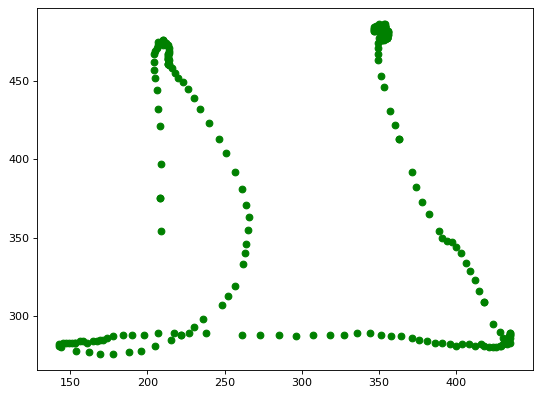

In [9]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(8,6), dpi = 80)

for x,y in path:
    cv2.circle(img, (x,y), 1)

plt.show()